# **GoogLeNet**

---



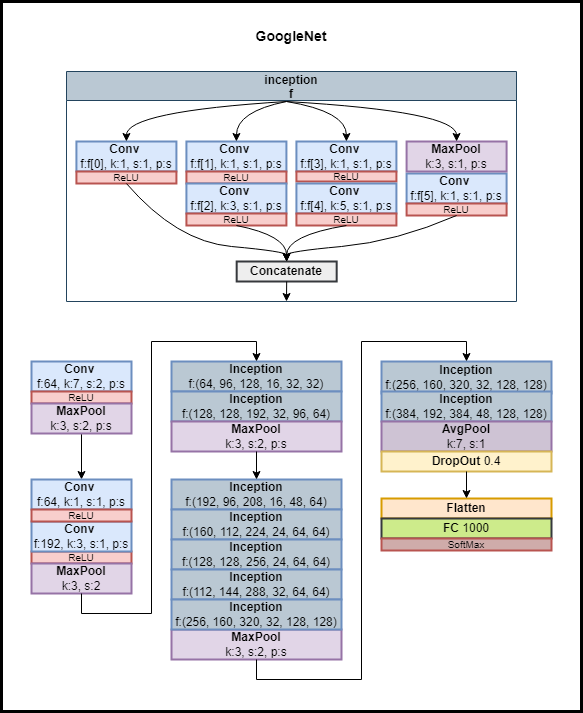

# **Final Code**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, \
     Concatenate, AvgPool2D, Dropout, Flatten, Dense
      
def inception_block(x, filters):
    t1 = Conv2D(filters=filters[0], kernel_size=1, activation='relu')(x)

    t2 = Conv2D(filters=filters[1], kernel_size=1, activation='relu')(x)
    t2 = Conv2D(filters=filters[2], kernel_size=3, padding='same', activation='relu')(t2)

    t3 = Conv2D(filters=filters[3], kernel_size=1, activation='relu')(x)
    t3 = Conv2D(filters=filters[4], kernel_size=5, padding='same', activation='relu')(t3)

    t4 = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    t4 = Conv2D(filters=filters[5], kernel_size=1, activation='relu')(t4)

    output = Concatenate()([t1, t2, t3, t4])
    return output

INPUT_SHAPE = 224, 224, 3

input = Input(INPUT_SHAPE)
x = Conv2D(filters=64, kernel_size=7, strides=2, padding='same', activation='relu')(input)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = Conv2D(filters=64, kernel_size=1, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPool2D(pool_size=3, strides=2)(x)

x = inception_block(x, filters=[64, 96, 128, 16, 32, 32])
x = inception_block(x, filters=[128, 128, 192, 32, 96, 64])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = inception_block(x, filters=[192, 96, 208, 16, 48, 64])
x = inception_block(x, filters=[160, 112, 224, 24, 64, 64])
x = inception_block(x, filters=[128, 128, 256, 24, 64, 64])
x = inception_block(x, filters=[112, 144, 288, 32, 64, 64])
x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

x = inception_block(x, filters=[256, 160, 320, 32, 128, 128])
x = inception_block(x, filters=[384, 192, 384, 48, 128, 128])
x = AvgPool2D(pool_size=7, strides=1)(x)
x = Dropout(rate=0.4)(x)

x = Flatten()(x)
output = Dense(units=1000, activation='softmax')(x)

from tensorflow.keras import Model
model = Model(inputs=input, outputs=output)
print(model.summary())
plot_model(model)


# **Breakdown**

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, \
      Concatenate, AvgPool2D, Dropout, Flatten, Dense

Inception_block()

*   Takes as inputs: A tensor (x), A list with no. of filters for each of the 6 conv layers of an inception block (filters)
*   Run: Apply the structure of the inception block as described above
*   Return the tensor: Will return the concatenated tensor OUTPUT



In [ ]:
def inception_block(x, filters):
  t1 = Conv2D(filters[0], kernel_size=1, activation='relu')(x)

  t2 = Conv2D(filters[1], kernel_size=1, activation='relu')(x)
  t2 = Conv2D(filters[2], kernel_size=3, padding='same', activation='relu')(t2)

  t3 = Conv2D(filters[3], kernel_size=1, activation='relu')(x)
  t3 = Conv2D(filters[4], kernel_size=5, padding='same', activation='relu')(t3)

  t4 = MaxPool2D(pool_size=3, strides=1, padding='same')(x)
  t4 = Conv2D(filters[5], kernel_size=1, activation='relu')(t4)

  output = Concatenate()([t1,t2,t3,t4])
  return output

Test of Inception Block

In [ ]:
input = Input([224,224,3])
output = inception_block(input, [1,1,1,1,1,1])

from tensorflow.keras import Model
model = Model(input, output)

from tensorflow.keras.utils import plot_model
plot_model(model)

# **Stem of the model**

conv and maxpool

In [ ]:
input = Input(shape=[224,224,3])
x = Conv2D(filters=64, kernel_size=7, strides=2, activation='relu')(input)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

conv and maxpool

In [ ]:
x = Conv2D(filters=64, kernel_size=1, activation='relu')(x)
x = Conv2D(filters=192, kernel_size=3, activation='relu')(x)
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)


inception, inception, maxpool

In [ ]:
x = inception_block(x, [64,96,128,16,32,32])
x = inception_block(x, [128,128,192,32,96,64])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

inception, inception, inception, inception, inception, maxpool

In [ ]:
x = inception_block(x, [192,96,208,16,48,64])
x = inception_block(x, [160,112,224,24,24,64,64])
x = inception_block(x, [128,128,256,24,64,64])
x = inception_block(x, [112,144,288,32,64,64])
x = inception_block(x, [256,160,320,32,128,128])
x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

inception, inceptin, avgpool, dropout, fully-connected

In [ ]:
x = inception_block(x,[256,160,320,32,128,128])
x = inception_block(x,[384,192,384,48,128,128])
x = AvgPool2D(pool_size=7, strides=1)(x)
x = Dropout(rate=0.4)(x)
output = Dense(units=1000, activation='softmax')(x)

Model Definition

In [ ]:
from tensorflow.keras import Model
model = Model(inputs=input, outputs=output)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 109, 109, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 55, 55, 64)  0           ['conv2d_6[0][0]']               
                                                                                            

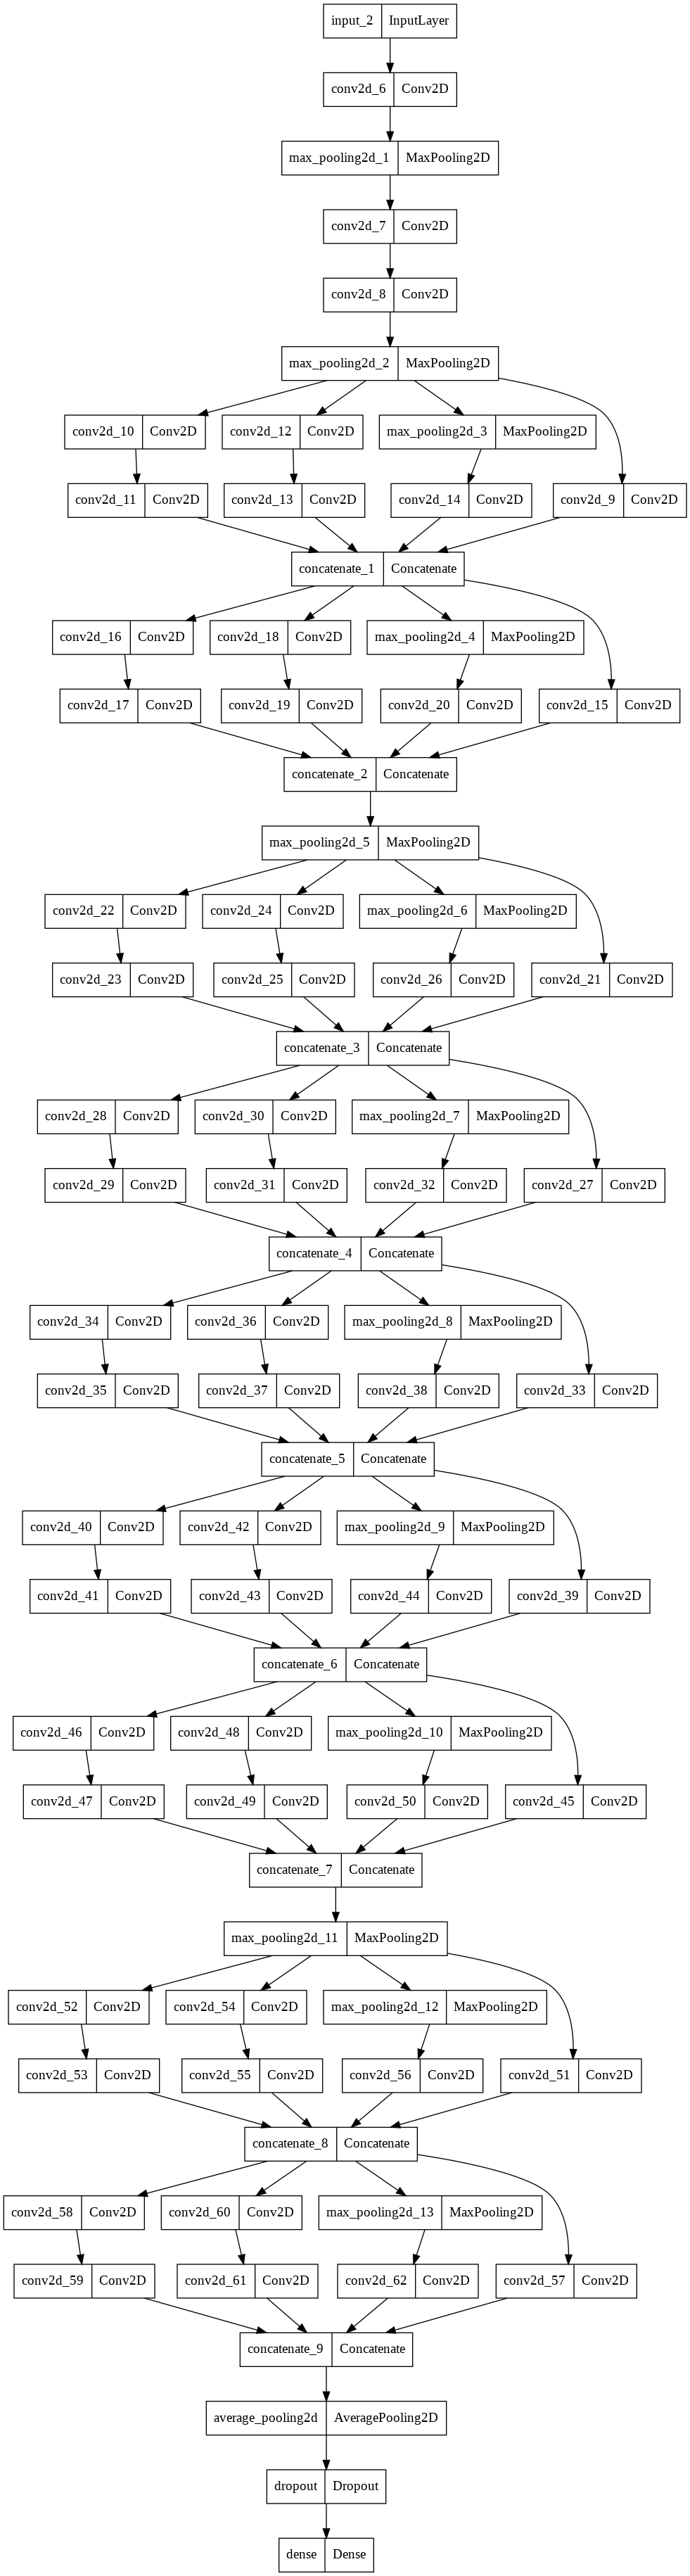

In [ ]:
plot_model(model)